In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

diabetes_data_set = pd.read_csv('../../../datasets/Diabetes_and_LifeStyle_Dataset.csv')
diabetes_data_set

,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,52,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97292,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
97293,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
97294,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
97295,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


In [2]:
diabetes_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97297 entries, 0 to 97296
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 97297 non-null  int64  
 1   gender                              97297 non-null  object 
 2   ethnicity                           97297 non-null  object 
 3   education_level                     97297 non-null  object 
 4   income_level                        97297 non-null  object 
 5   employment_status                   97297 non-null  object 
 6   smoking_status                      97297 non-null  object 
 7   alcohol_consumption_per_week        97297 non-null  int64  
 8   physical_activity_minutes_per_week  97297 non-null  int64  
 9   diet_score                          97297 non-null  float64
 10  sleep_hours_per_day                 97297 non-null  float64
 11  screen_time_hours_per_day           97297

In [3]:
y = diabetes_data_set['diagnosed_diabetes']
X = diabetes_data_set.copy()
X.drop(columns=['diagnosed_diabetes', 'diabetes_stage'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.6,
    random_state=42
)
X_test, X_val, y_test, y_val = train_test_split(
    X_test,
    y_test,
    train_size=0.5,
    random_state=42
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(58378, 29)
(58378,)
(19459, 29)
(19459,)
(19460, 29)
(19460,)


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'alcohol_consumption_per_week'}>,
        <Axes: title={'center': 'physical_activity_minutes_per_week'}>,
        <Axes: title={'center': 'diet_score'}>,
        <Axes: title={'center': 'sleep_hours_per_day'}>],
       [<Axes: title={'center': 'screen_time_hours_per_day'}>,
        <Axes: title={'center': 'family_history_diabetes'}>,
        <Axes: title={'center': 'hypertension_history'}>,
        <Axes: title={'center': 'cardiovascular_history'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'waist_to_hip_ratio'}>,
        <Axes: title={'center': 'systolic_bp'}>,
        <Axes: title={'center': 'diastolic_bp'}>,
        <Axes: title={'center': 'heart_rate'}>,
        <Axes: title={'center': 'cholesterol_total'}>],
       [<Axes: title={'center': 'hdl_cholesterol'}>,
        <Axes: title={'center': 'ldl_cholesterol'}>,
        <Axes: title={'center': 'triglycerides'}>,
        <Axes: 

<Figure size 5000x5000 with 0 Axes>

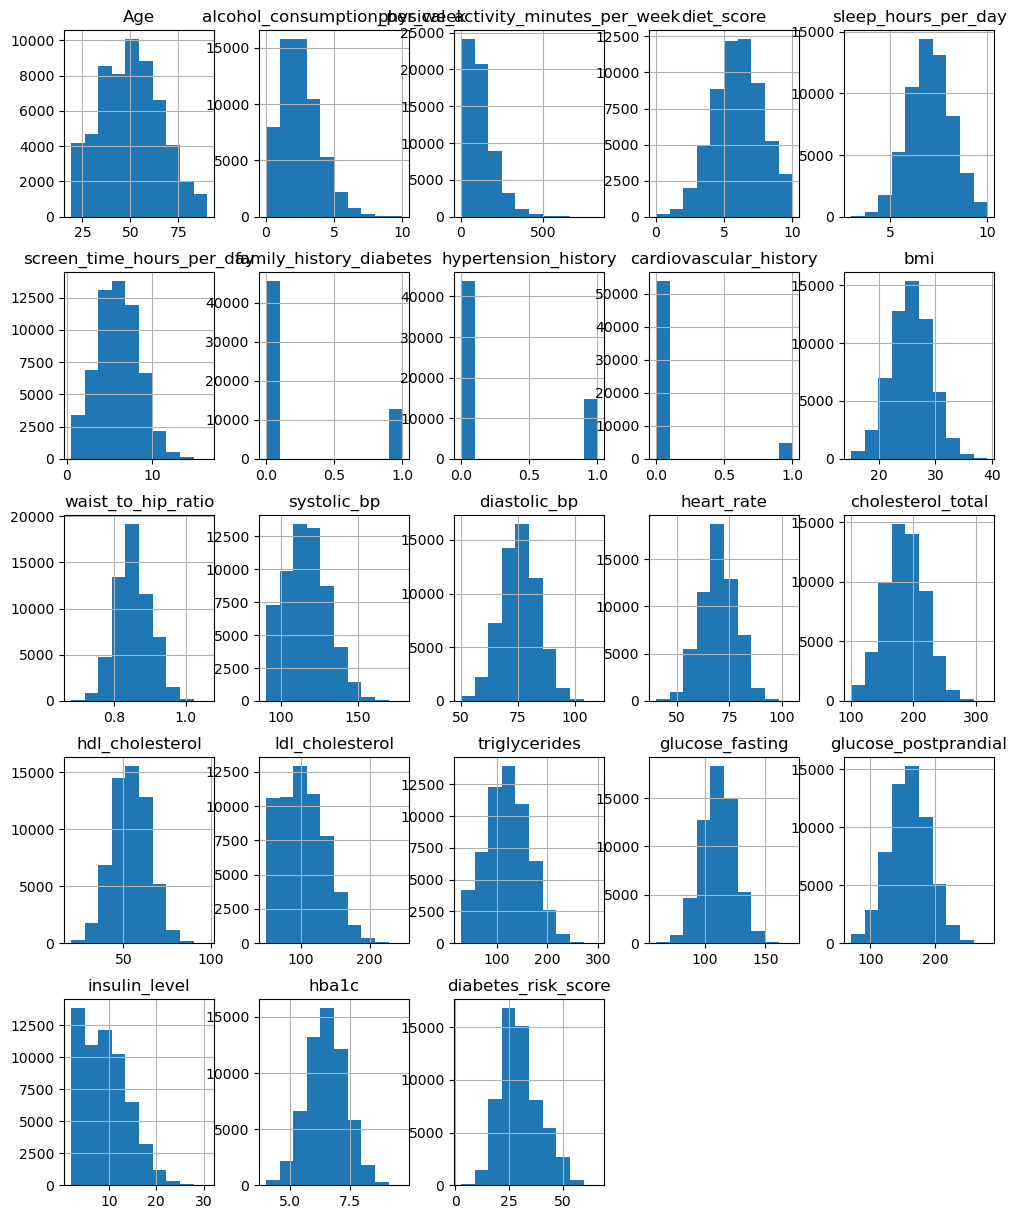

In [4]:
plt.figure(figsize=(50, 50))
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
X_train[num_cols].hist(figsize=(12, 15))

array([[<Axes: xlabel='cholesterol_total', ylabel='cholesterol_total'>,
        <Axes: xlabel='hdl_cholesterol', ylabel='cholesterol_total'>,
        <Axes: xlabel='ldl_cholesterol', ylabel='cholesterol_total'>,
        <Axes: xlabel='triglycerides', ylabel='cholesterol_total'>],
       [<Axes: xlabel='cholesterol_total', ylabel='hdl_cholesterol'>,
        <Axes: xlabel='hdl_cholesterol', ylabel='hdl_cholesterol'>,
        <Axes: xlabel='ldl_cholesterol', ylabel='hdl_cholesterol'>,
        <Axes: xlabel='triglycerides', ylabel='hdl_cholesterol'>],
       [<Axes: xlabel='cholesterol_total', ylabel='ldl_cholesterol'>,
        <Axes: xlabel='hdl_cholesterol', ylabel='ldl_cholesterol'>,
        <Axes: xlabel='ldl_cholesterol', ylabel='ldl_cholesterol'>,
        <Axes: xlabel='triglycerides', ylabel='ldl_cholesterol'>],
       [<Axes: xlabel='cholesterol_total', ylabel='triglycerides'>,
        <Axes: xlabel='hdl_cholesterol', ylabel='triglycerides'>,
        <Axes: xlabel='ldl_cholesterol'

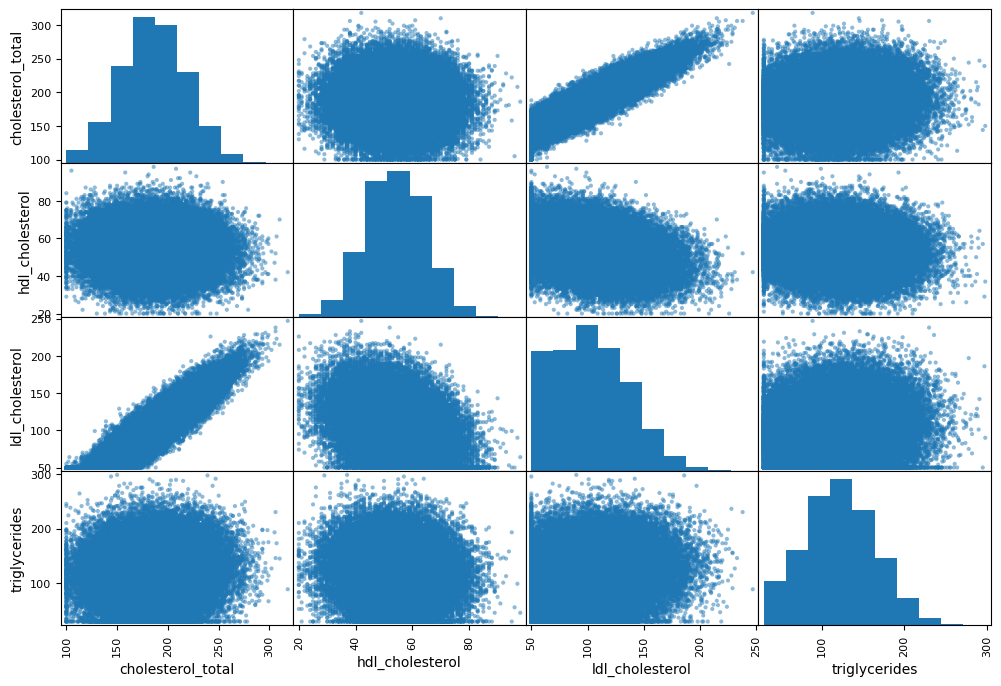

In [5]:
#Interesting there is some correlation between the cholesterol_total and ldl_cholesterol
scatter_matrix(X_train[['cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides']], figsize=(12, 8))

<Axes: xlabel='cholesterol_total', ylabel='ldl_cholesterol'>

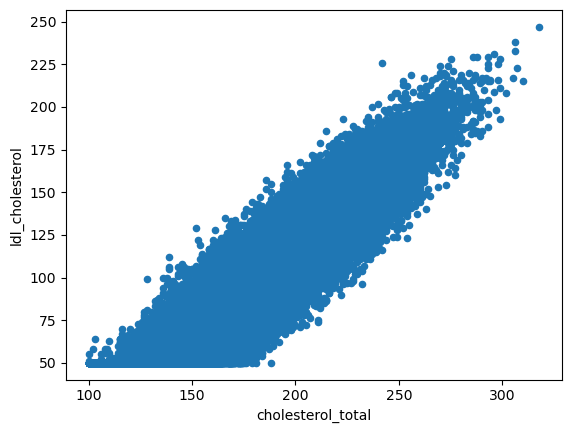

In [6]:
X_train.plot(kind='scatter', x='cholesterol_total', y='ldl_cholesterol')

array([[<Axes: xlabel='systolic_bp', ylabel='systolic_bp'>,
        <Axes: xlabel='diastolic_bp', ylabel='systolic_bp'>,
        <Axes: xlabel='heart_rate', ylabel='systolic_bp'>],
       [<Axes: xlabel='systolic_bp', ylabel='diastolic_bp'>,
        <Axes: xlabel='diastolic_bp', ylabel='diastolic_bp'>,
        <Axes: xlabel='heart_rate', ylabel='diastolic_bp'>],
       [<Axes: xlabel='systolic_bp', ylabel='heart_rate'>,
        <Axes: xlabel='diastolic_bp', ylabel='heart_rate'>,
        <Axes: xlabel='heart_rate', ylabel='heart_rate'>]], dtype=object)

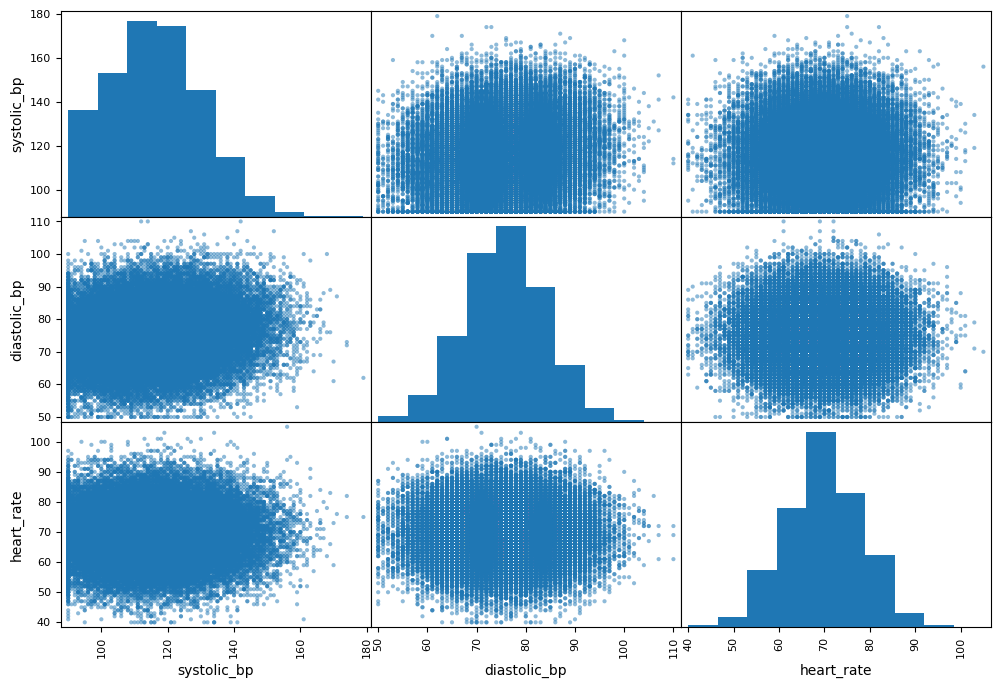

In [7]:
scatter_matrix(X_train[['systolic_bp', 'diastolic_bp', 'heart_rate']], figsize=(12, 8))

array([[<Axes: xlabel='glucose_fasting', ylabel='glucose_fasting'>,
        <Axes: xlabel='glucose_postprandial', ylabel='glucose_fasting'>,
        <Axes: xlabel='insulin_level', ylabel='glucose_fasting'>],
       [<Axes: xlabel='glucose_fasting', ylabel='glucose_postprandial'>,
        <Axes: xlabel='glucose_postprandial', ylabel='glucose_postprandial'>,
        <Axes: xlabel='insulin_level', ylabel='glucose_postprandial'>],
       [<Axes: xlabel='glucose_fasting', ylabel='insulin_level'>,
        <Axes: xlabel='glucose_postprandial', ylabel='insulin_level'>,
        <Axes: xlabel='insulin_level', ylabel='insulin_level'>]],
      dtype=object)

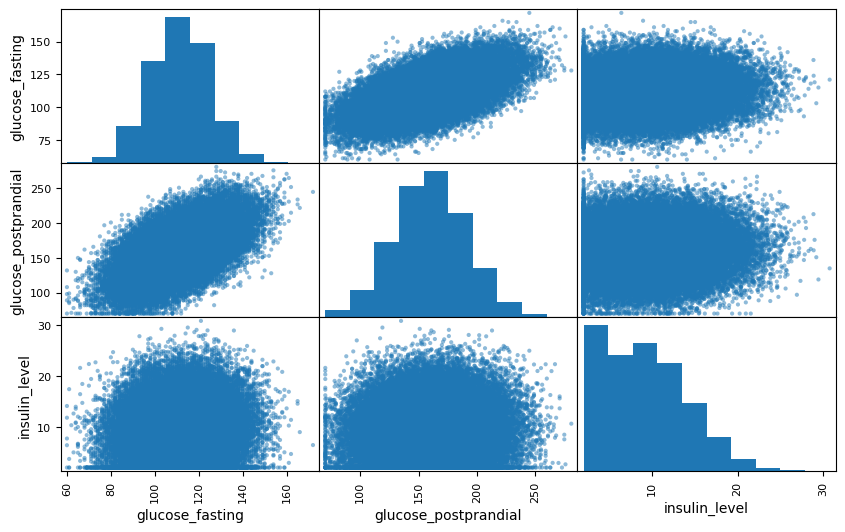

In [8]:
#There is some correlation between the glucose_postprandial and the glucose_fasting
scatter_matrix(X_train[['glucose_fasting', 'glucose_postprandial', 'insulin_level']], figsize=(10, 6))

<Axes: xlabel='glucose_fasting', ylabel='glucose_postprandial'>

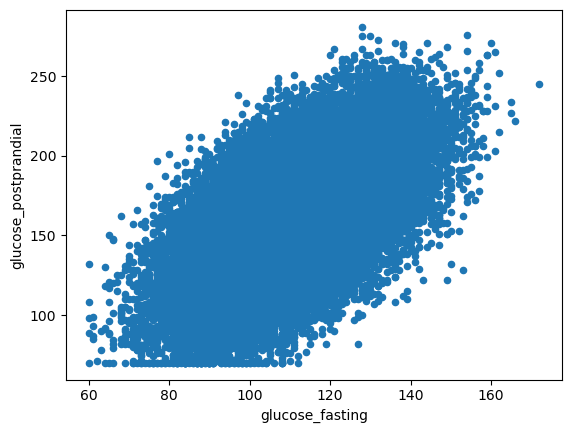

In [9]:
X_train.plot(kind='scatter', x='glucose_fasting', y='glucose_postprandial')

In [10]:
print(len(num_cols))

23


In [11]:
num_cols

['Age',
 'alcohol_consumption_per_week',
 'physical_activity_minutes_per_week',
 'diet_score',
 'sleep_hours_per_day',
 'screen_time_hours_per_day',
 'family_history_diabetes',
 'hypertension_history',
 'cardiovascular_history',
 'bmi',
 'waist_to_hip_ratio',
 'systolic_bp',
 'diastolic_bp',
 'heart_rate',
 'cholesterol_total',
 'hdl_cholesterol',
 'ldl_cholesterol',
 'triglycerides',
 'glucose_fasting',
 'glucose_postprandial',
 'insulin_level',
 'hba1c',
 'diabetes_risk_score']

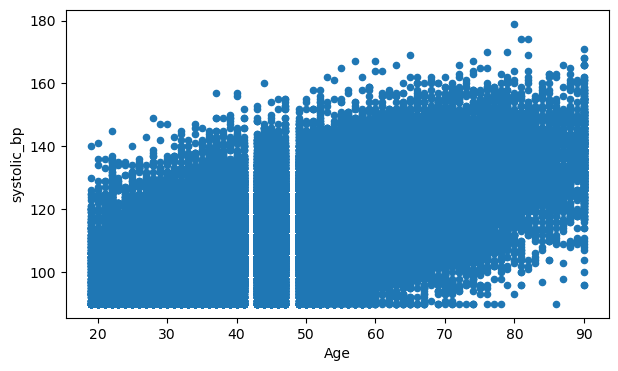

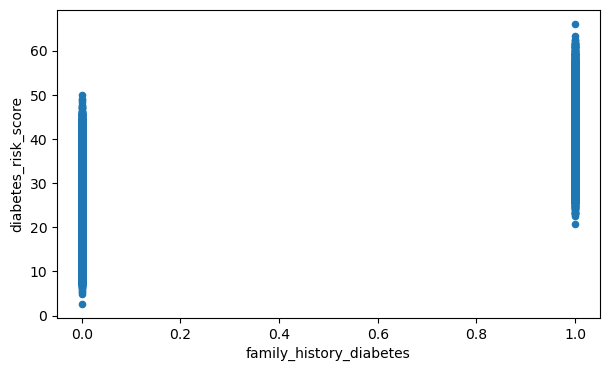

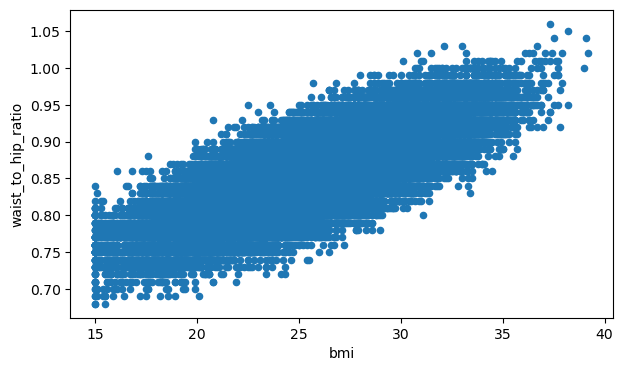

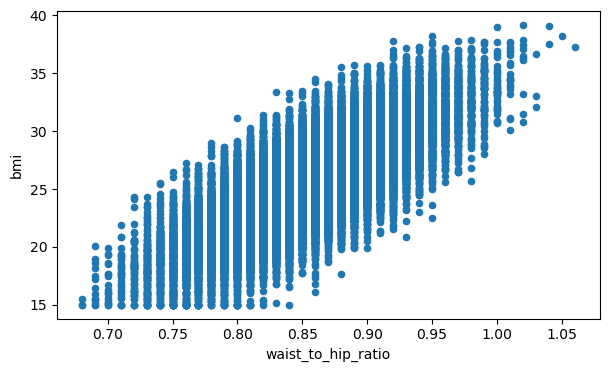

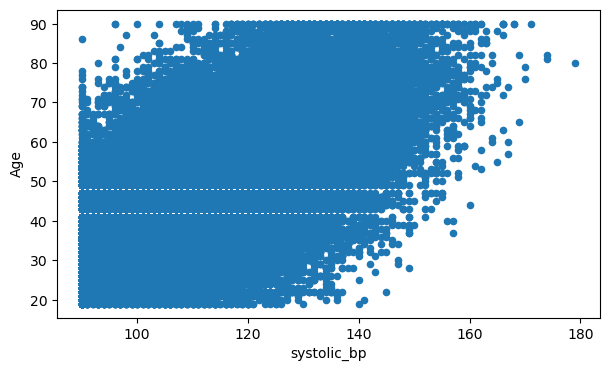

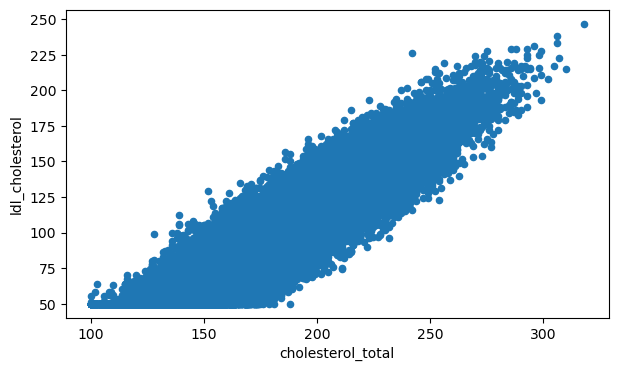

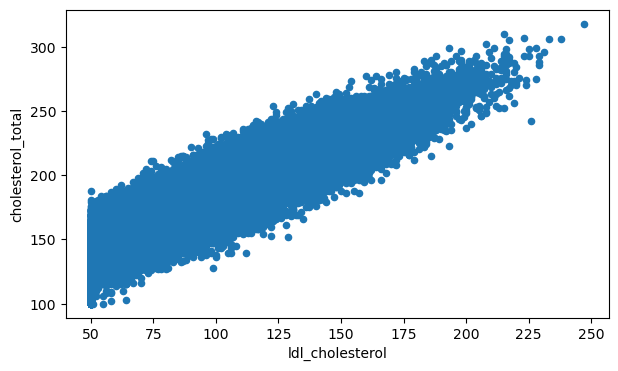

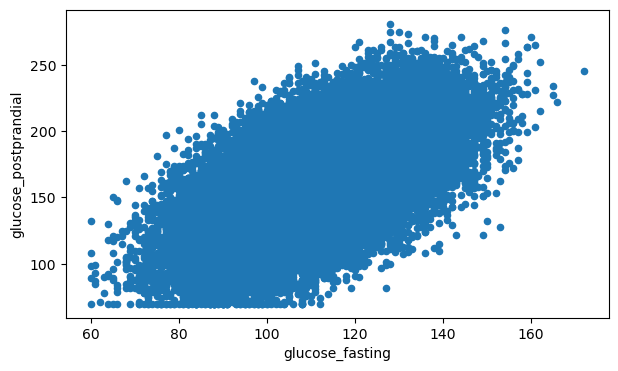

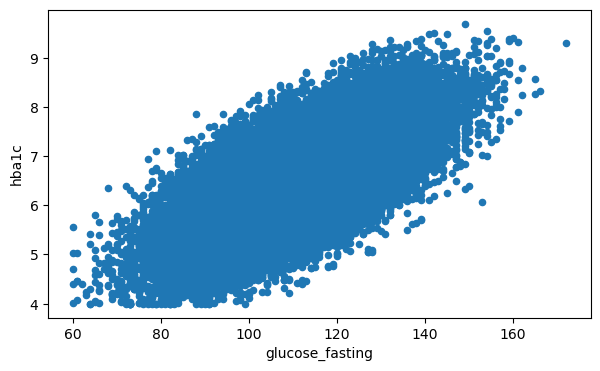

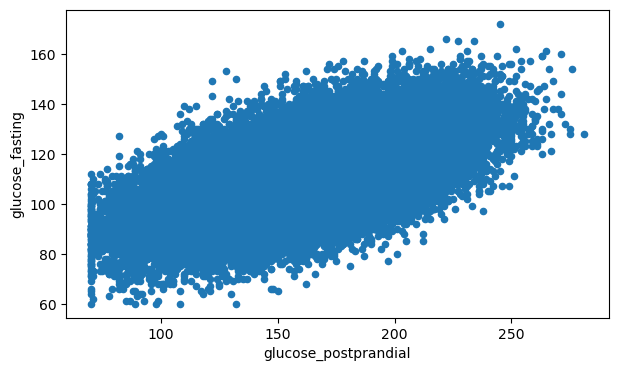

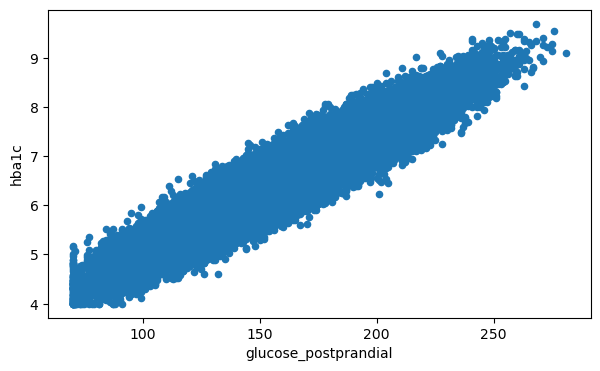

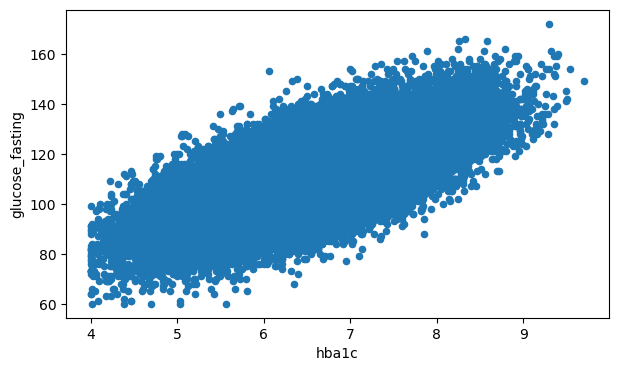

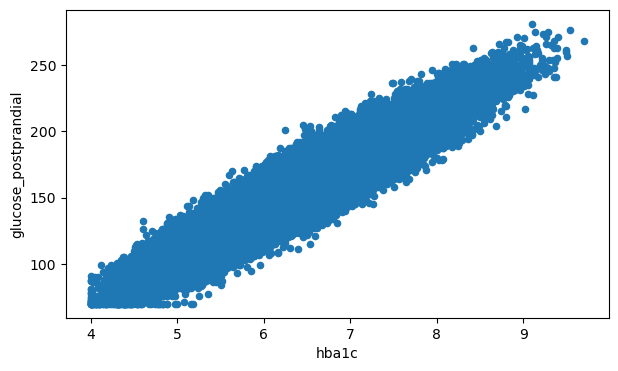

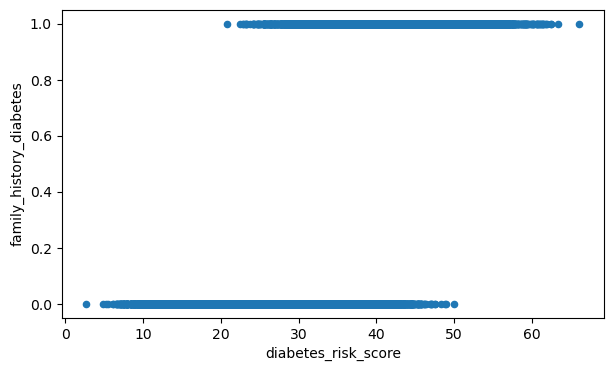

In [26]:
corr_matrix = X_train[num_cols].corr()

for col in num_cols:
    for col_corr in num_cols:
        if col == col_corr:
            continue
        col_corr_value = corr_matrix[col][col_corr]
        if col_corr_value > 0.5 or col_corr_value < -0.5:
            X_train.plot(kind='scatter', x=col, y=col_corr, figsize=(7,4))